<a href="https://colab.research.google.com/github/brdacunha/BECN/blob/main/Valores_de_Cinza_BECN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pingouin # precisa instalar o Pingouin toda vez que abrir o notebook.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 4.7 MB/s 
     |████████████████████████████████| 9.9 MB 42.1 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196208 sha256=4b6cc1ab217097af98cd6b21c687e54214c4b5c35778f327c3fa97daacb6d5fc
  Stored in directory: /root/.cache/pip/wheels/75/b0/89/f6866fc5accea9bec04f4c9f2a242520d6e8e7b8fcf89e139c
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=36c3ace46823956dd275cef30441fd3057a547923d087e442c5a767650fef2fa
  Stored in directory: /root/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [7]:
import pandas as pd
import pingouin as pg

Tecido1 = pd.read_csv('https://raw.githubusercontent.com/brdacunha/BECN/main/Tecido_1.csv')
Tecido2 = pd.read_csv('https://raw.githubusercontent.com/brdacunha/BECN/main/Tecido%202.csv')
df_1 = pd.read_csv('https://raw.githubusercontent.com/brdacunha/BECN/main/Tecido_1_para_ANOVA.csv') # tabela de valores do Tecido_1 no formato para calcular ANOVA
df_2 = pd.read_csv('https://raw.githubusercontent.com/brdacunha/BECN/main/Tecido%202_ANOVA.csv') # tabela de valores do Tecido_2 no formato para calcular ANOVA
Total1 = pd.read_csv('https://raw.githubusercontent.com/brdacunha/BECN/main/TOTAL_Tecido1.csv') # tabela com valores de píxels abrangendo quase a totalidade do tecido 1 (450x450 pixels) - ANOVA
Total1_Gráfico = pd.read_csv('https://raw.githubusercontent.com/brdacunha/BECN/main/TOTAL_Tecido1_Gr%C3%A1ficos.csv') # tabela com valores de píxels abrangendo quase a totalidade do tecido 1 (450x450 pixels) - Gráfico
Total2_Gráfico = pd.read_csv('https://raw.githubusercontent.com/brdacunha/BECN/main/TOTAL_Tecido2_Gr%C3%A1ficos.csv') # tabela com valores de píxels abrangendo quase a totalidade do tecido 2 (300x300 pixels) - Gráfico
Total2 = pd.read_csv('https://raw.githubusercontent.com/brdacunha/BECN/main/TOTAL_Tecido2_ANOVA.csv') # tabela com valores de píxels abrangendo quase a totalidade do tecido 2 (300x300 pixels) - ANOVA

**Gráfico Tecido Total 1**

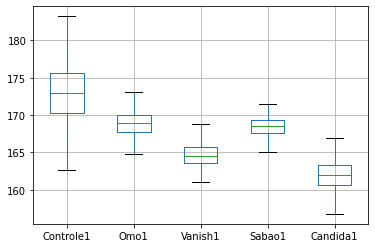

In [8]:
import matplotlib.pyplot as plt

plt.figure()
Total1_Gráfico.boxplot(['Controle1','Omo1','Vanish1','Sabao1','Candida1'], sym='')

plt.show()

**Homoscedasticidade Tecido Total 1**

In [11]:
pg.homoscedasticity(Total1, dv = 'Valores de Cinza', group= 'Grupos', method = 'levene', alpha=0.05)

,W,pval,equal_var
levene,171.045526,5.045165e-128,False


**Welch ANOVA Tecido Total 1:**

In [12]:
import pingouin as pg

waov_Total1 = pg.welch_anova(data = Total1, dv = 'Valores de Cinza', between = 'Grupos') # teste ANOVA para Tecido Total 1
waov_Total1

,Source,ddof1,ddof2,F,p-unc,np2
0,Grupos,4,1109.183768,1510.076958,0.0,0.72


**Teste Games-Howell Tecido Total 1**

In [16]:
pgh_Total1 = pg.pairwise_gameshowell(data = Total1, dv = 'Valores de Cinza', between = 'Grupos', effsize = 'cohen') # Teste Tukey para verificar a diferença estatística entre os grupos - Tecido 1.
pgh_Total1.round(5)

,A,B,mean(A),mean(B),diff,se,T,df,pval,cohen
0,Candida1,Controle1,161.99732,173.04627,-11.04896,0.21402,-51.62701,632.43831,0.0,-3.43798
1,Candida1,Omo1,161.99732,168.97370,-6.97639,0.12093,-57.69051,891.97039,0.0,-3.84177
2,Candida1,Sabao1,161.99732,168.43545,-6.43814,0.11094,-58.03255,825.28198,0.0,-3.86455
3,Candida1,Vanish1,161.99732,164.64685,-2.64953,0.11694,-22.65770,874.46652,0.0,-1.50884
4,Controle1,Omo1,173.04627,168.97370,4.07257,0.21075,19.32431,602.89733,0.0,1.28686
5,Controle1,Sabao1,173.04627,168.43545,4.61082,0.20518,22.47199,551.13146,0.0,1.49647
6,Controle1,Vanish1,173.04627,164.64685,8.39942,0.20848,40.28799,582.01432,0.0,2.68289
7,Omo1,Sabao1,168.97370,168.43545,0.53825,0.10450,5.15071,861.26663,0.0,0.34300
8,Omo1,Vanish1,168.97370,164.64685,4.32685,0.11085,39.03470,894.66107,0.0,2.59943
9,Sabao1,Vanish1,168.43545,164.64685,3.78860,0.09986,37.94095,883.40417,0.0,2.52659


**Gráfico Tecido Total 2**

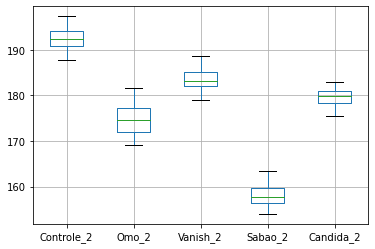

In [17]:
import matplotlib.pyplot as plt

plt.figure()
Total2_Gráfico.boxplot(['Controle_2','Omo_2','Vanish_2','Sabao_2','Candida_2'])

plt.show()

**Homoscedasticidade Tecido Total 2**

In [18]:
pg.homoscedasticity(Total2, dv = 'Valores de Cinza', group= 'Grupos', method = 'levene', alpha=0.05)

,W,pval,equal_var
levene,40.027675,6.858734e-32,False


**Welch ANOVA Tecido Total 2:**

In [21]:
waov_Total2 = pg.welch_anova(data = Total2, dv = 'Valores de Cinza', between = 'Grupos') # teste ANOVA para Tecido Total 1
waov_Total2

,Source,ddof1,ddof2,F,p-unc,np2
0,Grupos,4,739.095769,10402.398789,0.0,0.959079


**Teste Games-Howell Tecido Total 2**

In [26]:
pgh_Total2 = pg.pairwise_gameshowell(data = Total2, dv = 'Valores de Cinza', between = 'Grupos', effsize = 'cohen') # Teste Tukey para verificar a diferença estatística entre os grupos - Tecido 1.
pgh_Total2.round(5)

,A,B,mean(A),mean(B),diff,se,T,df,pval,cohen
0,Candida_2,Controle_2,179.65967,192.43007,-12.77040,0.15960,-80.01704,543.28840,0.0,-6.53336
1,Candida_2,Omo_2,179.65967,174.81217,4.84750,0.21185,22.88201,434.83534,0.0,1.86831
2,Candida_2,Sabao_2,179.65967,158.00643,21.65323,0.15374,140.84440,558.94585,0.0,11.49990
3,Candida_2,Vanish_2,179.65967,183.70613,-4.04647,0.15902,-25.44667,544.83925,0.0,-2.07771
4,Controle_2,Omo_2,192.43007,174.81217,17.61790,0.23014,76.55446,527.20092,0.0,6.25065
5,Controle_2,Sabao_2,192.43007,158.00643,34.42363,0.17810,193.28597,596.00457,0.0,15.78173
6,Controle_2,Vanish_2,192.43007,183.70613,8.72393,0.18267,47.75704,597.98176,0.0,3.89935
7,Omo_2,Sabao_2,174.81217,158.00643,16.80573,0.22611,74.32451,509.95643,0.0,6.06857
8,Omo_2,Vanish_2,174.81217,183.70613,-8.89397,0.22973,-38.71407,525.56996,0.0,-3.16099
9,Sabao_2,Vanish_2,158.00643,183.70613,-25.69970,0.17758,-144.72284,596.36528,0.0,-11.81657


##**Conclusões:**